# One & Done Rule: Background

### Zion Williamson caught the attention of basketball fans before he was a legal adult due to his viral dunks. Williamson attended Duke university for one year before being drafted first overall by the New Orleans Pelicans. During that year at Duke, Williamson, like all NCAA athletes, was not eligible for compensation. 

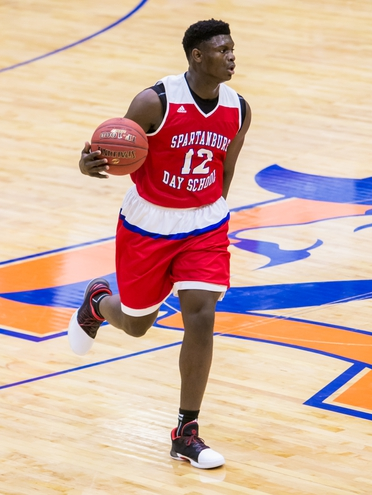

### If you research Kobe Bryant's and LeBron James' respective colleges, you'll find that they don't have an alma matter: they entered the NBA directly from high school.

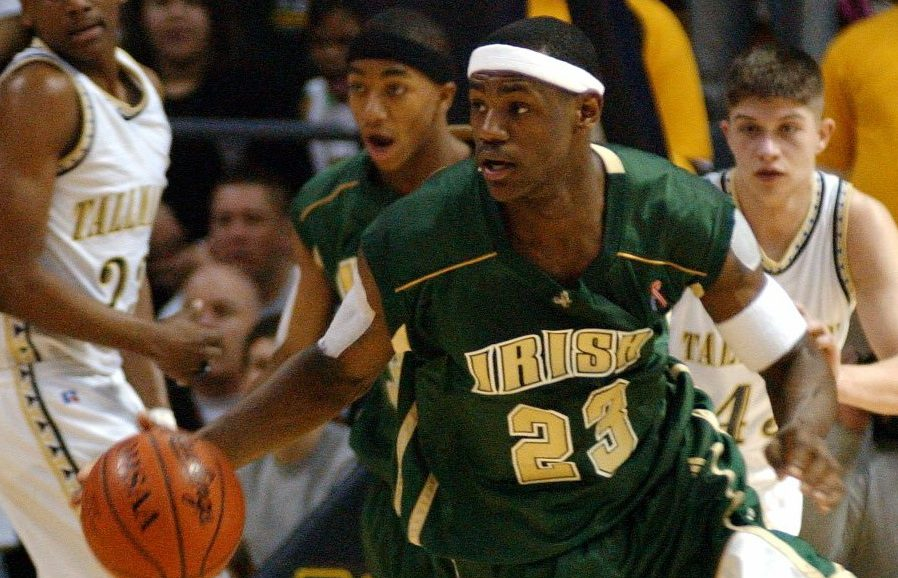

### The One-and-Done Rule was first introduced in the 2006 NBA draft and stated that players need to be at least 19 years old or be at least one year out of high school before being drafted to the NBA. Although players are free to choose how they spend the year after graduating from high school, nearly every NBA prospect since the institution of the rule has spent the year playing in the NCAA. 

### The NCAA provides the most competitive and scout-visible stage for amateur players. As a result of the rule, the best players often attend only one year of college before declaring for the NBA draft; this trend has been nicknamed “one and done.”

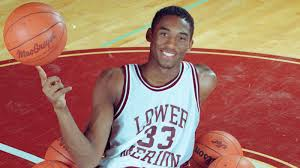

### The NCAA argues that this rule allows players to mature and develop, and therefore will be better prepared to enter and play in the NBA. Since its institution, the rule has been controversial. Critics question its effectiveness and efficiency, as many believe that a single year out of high school does not amount to significant development.

### In addition, since the NCAA has gained substantial revenues from top players being prevented from foregoing playing in college, critics have also claimed that the rule has been implemented only to generate profits for the NCAA. Although the NCAA and the NBA have favored the rule, players argue that they are forced to wait an additional year before earning a salary, as the NCAA prohibits players from accepting compensation.

## Today, I'll analyze the effectiveness of the One & Done rule by investigating how rookies performed before and after the rule was enacted.

In [1]:
import requests
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import unidecode
import re
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

## Grab Data

### Grab Headers

In [2]:
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(1995)
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2) #tr is html tag for table row

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')] #gettext for table header

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

### Scrape data from basketball-reference.com

In [3]:
df = pd.DataFrame() 
for year in range(1995,2020):
    url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
    html = urlopen(url)
    soup = BeautifulSoup(html)
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
                for i in range(len(rows))]
    player_stats = [x for x in player_stats if x !=[]]
    for x in range(0, len(player_stats)):
        player_stats[x].append(year) #Add season to rows
        
    #ADD ROOKIE DUMMY
    rookie_url = "https://www.basketball-reference.com/leagues/NBA_{}_rookies.html".format(year)
    html_rookie = urlopen(rookie_url)
    soup_rookie = BeautifulSoup(html_rookie)
    rows_rookie = soup_rookie.findAll('tr')[1:]
    rookies = pd.DataFrame([[td.getText() for td in rows_rookie[i].findAll('td')]
                for i in range(len(rows_rookie))])
    rookie_names = rookies.iloc[:,0].tolist()
    rookie_names = [x for x in rookie_names if x is not None] #remove NoneType
    rookie_names = [unidecode.unidecode(x.lower()) for x in rookie_names]
    
    #Add Rookie Indicator
    for x in range(0, len(player_stats)):
        if isinstance(player_stats[x][0], str): 
            if unidecode.unidecode(player_stats[x][0].lower()) in rookie_names:
                player_stats[x].append(1)
        else:
            player_stats[x].append(0)
    
    df = df.append(player_stats)
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
484,Quentin Richardson,SF,30,ORL,57,19,16.8,1.5,4.5,.341,...,2.4,3.1,0.7,0.4,0.1,0.6,1.3,4.4,2011,NaN
545,Chris Webber,PF,31,TOT,67,67,35.4,8.3,19.1,.433,...,7.2,9.1,4.7,1.4,0.8,2.7,3.2,19.5,2005,NaN
513,Mark West,C,37,IND,15,1,7.0,0.7,1.4,.476,...,0.6,1.0,0.1,0.1,0.3,0.5,1.0,1.5,1998,NaN
204,Donté Greene,SF,21,SAC,76,50,21.4,3.2,7.3,.441,...,2.4,3.1,0.9,0.5,0.7,1.2,2.0,8.5,2010,NaN
429,Ryan Stack,PF,23,CLE,18,0,11.1,0.8,2.1,.378,...,0.8,1.9,0.3,0.1,0.6,0.5,1.7,2.6,1999,1.0
212,Robert Horry,PF,27,LAL,72,71,30.4,2.8,5.8,.476,...,4.9,7.5,2.3,1.6,1.3,1.4,3.3,7.4,1998,NaN
519,Jerome Williams,PF,27,TOT,59,2,20.0,2.3,5.0,.463,...,4.2,6.5,0.8,1.0,0.3,1.1,2.1,6.3,2001,NaN
394,Brian Skinner,PF,26,PHI,77,9,17.9,2.4,4.3,.550,...,3.0,4.8,0.2,0.6,0.7,0.8,2.3,6.0,2003,NaN
396,Zaza Pachulia,C,28,ATL,52,15,21.8,2.2,4.6,.473,...,3.9,6.5,1.5,0.7,0.2,1.3,2.5,5.9,2013,NaN
222,Marc Jackson,C,27,GSW,17,0,9.9,1.3,3.8,.338,...,1.5,2.5,0.4,0.3,0.2,0.7,1.5,4.9,2002,NaN


In [4]:
headers.append('Season')
headers.append('Rookie')
df.columns = headers
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,Rookie
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995,NaN
1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995,NaN
2,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995,NaN
3,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,.470,...,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995,NaN
4,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,.453,...,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995,NaN


In [5]:
df.Rookie.value_counts()

1.0    2083
Name: Rookie, dtype: int64

#### Take a look at Kobe Bryant: our data put an asterisk next to his name. To avoid search errors, let's remove any asterisks

In [6]:
df[df.apply(lambda x: (x['Season']==1997) & (x['Rookie']==1) & (x['Tm']=='LAL'), axis=1)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,Rookie
61,Kobe Bryant*,SF,18,LAL,71,6,15.5,2.5,5.9,.417,...,1.2,1.9,1.3,0.7,0.3,1.6,1.4,7.6,1997,1.0
167,Derek Fisher,PG,22,LAL,80,3,11.5,1.3,3.3,.397,...,0.9,1.2,1.5,0.5,0.1,0.9,1.1,3.9,1997,1.0
278,Travis Knight,C,22,LAL,71,14,16.3,2.0,3.9,.509,...,2.7,4.5,0.5,0.4,0.8,0.7,2.4,4.8,1997,1.0


In [7]:
df['Player'] = df.Player.apply(lambda x: x.replace('*',''))

#### Let's Check 

In [8]:
df[df.apply(lambda x: (x['Season']==1997) & (x['Rookie']==1) & (x['Tm']=='LAL'), axis=1)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,Rookie
61,Kobe Bryant,SF,18,LAL,71,6,15.5,2.5,5.9,.417,...,1.2,1.9,1.3,0.7,0.3,1.6,1.4,7.6,1997,1.0
167,Derek Fisher,PG,22,LAL,80,3,11.5,1.3,3.3,.397,...,0.9,1.2,1.5,0.5,0.1,0.9,1.1,3.9,1997,1.0
278,Travis Knight,C,22,LAL,71,14,16.3,2.0,3.9,.509,...,2.7,4.5,0.5,0.4,0.8,0.7,2.4,4.8,1997,1.0


#### Define players who came straight from High School. Source: https://en.wikipedia.org/wiki/NBA_high_school_draftees#Early_years

In [9]:
hs = ['Kevin Garnett','Kobe Bryant',"Jermaine O'Neal","Tracy McGrady","Al Harrington","Rashard Lewis","Korleone Young",
      "Jonathan Bender","Leon Smith","Darius Miles","DeShawn Stevenson","Kwame Brown","Tyson Chandler","Eddy Curry",
      "Desagana Diop","Ousmane Cisse","Amar'e Stoudemire","LeBron James","travis Outlaw","Ndudi Ebi","Kendrick Perkins",
     "James Lang","Dwight Howard","Shaun Livingston","Robert Swift","Sebastian Telfair","Al Jefferson","Josh Smith",
     "J.R. Smith","Dorell Wright","Martell Webster","Andrew Bynum","Gerald Green","C.J. Miles","Ricky Sanchez",
     "Monta Ellis","Lou Williams","Andray Blatche","Amir Johnson"]

#### Create One & Done column: 1 if player is in the list above and the row is their rookie season

In [10]:
df['onedone'] = df.apply(lambda x: 1 if ((isinstance(x['Player'], str)) & (any(s.lower() in unidecode.unidecode(x['Player'].lower()) for s in hs)) & (x['Rookie']==1)) else 0, axis=1)

#### There were two "one & done" players who didn't see playing time in the nba: Ousmane Cisse & Ricky Sanchez. So, if we did everything right, there should be 39 players in our one & done list and 37 in our dataframe

In [11]:
#make sure we're catching all players from one and done list
print('Number of one & done players: ',len(hs))
print('\n','Number of one & done in df',len(df[df.onedone==1]))

Number of one & done players:  39

 Number of one & done in df 37


In [12]:
df[df.Player =='LeBron James']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Season,Rookie,onedone
256,LeBron James,SG,19,CLE,79,79,39.5,7.9,18.9,.417,...,5.5,5.9,1.6,0.7,3.5,1.9,20.9,2004,1.0,1
268,LeBron James,SF,20,CLE,80,80,42.4,9.9,21.1,.472,...,7.4,7.2,2.2,0.7,3.3,1.8,27.2,2005,NaN,0
256,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,.480,...,7.0,6.6,1.6,0.8,3.3,2.3,31.4,2006,NaN,0
234,LeBron James,SF,22,CLE,78,78,40.9,9.9,20.8,.476,...,6.7,6.0,1.6,0.7,3.2,2.2,27.3,2007,NaN,0
274,LeBron James,SF,23,CLE,75,74,40.4,10.6,21.9,.484,...,7.9,7.2,1.8,1.1,3.4,2.2,30.0,2008,NaN,0
272,LeBron James,SF,24,CLE,81,81,37.7,9.7,19.9,.489,...,7.6,7.2,1.7,1.1,3.0,1.7,28.4,2009,NaN,0
285,LeBron James,SF,25,CLE,76,76,39.0,10.1,20.1,.503,...,7.3,8.6,1.6,1.0,3.4,1.6,29.7,2010,NaN,0
311,LeBron James,SF,26,MIA,79,79,38.8,9.6,18.8,.510,...,7.5,7.0,1.6,0.6,3.6,2.1,26.7,2011,NaN,0
268,LeBron James,SF,27,MIA,62,62,37.5,10.0,18.9,.531,...,7.9,6.2,1.9,0.8,3.4,1.5,27.1,2012,NaN,0
254,LeBron James,PF,28,MIA,76,76,37.9,10.1,17.8,.565,...,8.0,7.3,1.7,0.9,3.0,1.4,26.8,2013,NaN,0


#### Lebron has a 1 in the one & done column for his rookie year, so that column is correct

#### Looks like our "rookie" column didn't fill in the zeros: let's fix that

In [13]:
df['Rookie'].fillna(0,inplace=True)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Season,Rookie,onedone
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995,0.0,0
1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995,0.0,0
2,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995,0.0,0
3,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,.470,...,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995,0.0,0
4,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,.453,...,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,...,4.5,0.8,0.3,0.8,1.0,4.0,11.5,2019,0.0,0
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,...,5.4,0.9,0.2,0.4,1.0,1.9,7.8,2019,0.0,0
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,...,6.1,1.1,0.2,0.9,1.2,2.3,8.9,2019,0.0,0
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,...,4.9,0.8,0.1,0.8,1.0,2.2,8.5,2019,0.0,0


## Draft Picks

#### In order to evaluate the performance of players who didn't go to the nba right after high school, we'll omit players selected out of college in the second round. My assumption is that these players wouldn't have been eligible to get drafted out of high school. In addition, second round players generally perform worse than first round, so including them may unfairly skew our results. 

In [14]:
url = "https://www.basketball-reference.com/draft/NBA_{}.html".format(2020)
html = urlopen(url)
soup = BeautifulSoup(html)
soup.findAll('tr', limit=2) #tr is html tag for table row
picks_headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')] #gettext for table header

In [15]:
picks_headers

['Rk',
 'Pk',
 'Tm',
 'Player',
 'College',
 'Yrs',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'FG%',
 '3P%',
 'FT%',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'WS',
 'WS/48',
 'BPM',
 'VORP']

In [16]:
url = "https://www.basketball-reference.com/draft/NBA_{}.html".format(1995)
html = urlopen(url)
soup = BeautifulSoup(html)
soup.findAll('tr', limit=2) #tr is html tag for table row
picks_headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')] #gettext for table header

picks = pd.DataFrame()
for year in range(1995,2020):
    url = "https://www.basketball-reference.com/draft/NBA_{}.html".format(year)
    html = urlopen(url)
    soup = BeautifulSoup(html)
    rows = soup.findAll('tr')[1:]
    draft_picks = [[td.getText() for td in rows[i].findAll('td')]
                for i in range(len(rows))]
    draft_picks = [x for x in draft_picks if x !=[]]
    for x in range(0, len(draft_picks)):
        draft_picks[x].append(year)
    picks = picks.append(draft_picks)
#picks.columns = picks_headers
picks

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,GSW,Joe Smith,Maryland,16,1030,27022,11208,6575,1010,...,.790,26.2,10.9,6.4,1.0,60.3,.107,-1.5,3.0,1995.0
1,2,LAC,Antonio McDyess,Alabama,15,1015,28053,12227,7638,1300,...,.670,27.6,12.0,7.5,1.3,69.8,.119,-0.1,13.2,1995.0
2,3,PHI,Jerry Stackhouse,UNC,18,970,30222,16409,3067,3240,...,.822,31.2,16.9,3.2,3.3,52.4,.083,0.3,17.4,1995.0
3,4,WSB,Rasheed Wallace,UNC,16,1109,36243,16006,7404,1994,...,.721,32.7,14.4,6.7,1.8,105.1,.139,2.2,38.4,1995.0
4,5,MIN,Kevin Garnett,,21,1462,50418,26071,14662,5445,...,.789,34.5,17.8,10.0,3.7,191.4,.182,5.6,96.9,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,LAC,Jaylen Hands,UCLA,,,,,,,...,,,,,,,,,,2019.0
56,57,NOP,Jordan Bone,Tennessee,2,24,249,68,28,26,...,,10.4,2.8,1.2,1.1,0.1,.019,-5.9,-0.2,2019.0
57,58,GSW,Miye Oni,Yale,2,38,329,86,64,10,...,.818,8.7,2.3,1.7,0.3,0.6,.082,-3.1,-0.1,2019.0
58,59,TOR,Dewan Hernandez,Miami (FL),1,6,28,14,14,3,...,.600,4.7,2.3,2.3,0.5,0.0,.043,-9.6,-0.1,2019.0


In [17]:
picks_headers.append('year')
picks_headers.remove('Rk')
picks.columns=picks_headers
picks.sample(5)

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP,year
32,33,POR,Joey Dorsey,Memphis,4,130,1488,344,513,55,...,.375,11.4,2.6,3.9,0.4,2.9,.092,-2.7,-0.3,2008.0
32,33,POR,Dante Cunningham,Villanova,10,715,14875,4133,2676,506,...,.649,20.8,5.8,3.7,0.7,24.9,.080,-1.7,1.1,2009.0
38,39,PHI,Jerami Grant,Syracuse,7,493,12516,5128,1944,594,...,.702,25.4,10.4,3.9,1.2,25.5,.098,-0.6,4.3,2014.0
17,18,PHO,Tyler Ennis,Syracuse,4,186,2336,779,250,359,...,.768,12.6,4.2,1.3,1.9,1.3,.026,-3.4,-0.8,2014.0
0,1,CHI,Derrick Rose,Memphis,12,621,19990,11523,2086,3446,...,.827,32.2,18.6,3.4,5.5,40.6,.097,1.3,16.9,2008.0


#### Add draft picks to master df

In [18]:
df['pick'] = df.Player.map(pd.Series(picks.Pk.values,index=picks.Player).to_dict())
df.sample(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Season,Rookie,onedone,pick
490,David Vaughn,PF,24,NJN,15,2,10.7,1.3,2.2,.576,...,0.1,0.3,0.3,0.6,2.3,2.9,1998,0.0,0,25
544,Otto Porter,SF,25,CHI,15,15,32.8,6.5,13.4,.483,...,2.7,1.2,0.6,1.7,1.9,17.5,2019,0.0,0,3
78,Antoine Carr,SF,38,VAN,21,0,10.5,1.3,3.0,.438,...,0.3,0.1,0.3,0.4,2.0,3.2,2000,0.0,0,NaN
113,Acie Earl,C,24,BOS,30,3,6.9,0.9,2.3,.382,...,0.1,0.2,0.3,0.5,1.3,2.2,1995,0.0,0,NaN
273,Rodney Hood,SG,22,UTA,50,21,21.3,3.1,7.5,.414,...,1.7,0.6,0.2,0.9,2.4,8.7,2015,1.0,0,23


###### Seth Curry went undrafted, and Jayson Williams was drafted before 1995, so this is correct!

#### Add indicator if the player was drafted after 2005, when the rule was enacted

In [19]:
df['pick'] = df.pick.replace(np.NaN,61) # replace undrafted players with 61st pick, since there are 60 picks per draft
df['PTS'], df['pick'], df['Season'], df['Rookie'], df['onedone'] = df['PTS'].astype(float), df['pick'].astype(float), df['Season'].astype(float), df['Rookie'].astype(float), df['onedone'].astype(float)

In [20]:
df['rule'] = df.apply(lambda x: 1 if (x['Rookie']==1.0 and x['Season'] >2005) else 0, axis=1)
df.sample(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Season,Rookie,onedone,pick,rule
423,Michael Smith,PF,26,VAN,48,10,22.9,1.6,3.0,.535,...,1.0,0.4,1.3,2.2,4.8,1999.0,0.0,0.0,61.0,0
388,Stanley Roberts,C,28,HOU,6,0,5.5,0.8,2.2,.385,...,0.0,0.2,0.7,0.3,2.3,1999.0,0.0,0.0,61.0,0
363,Ruben Patterson,SF,31,MIL,81,53,31.0,5.9,10.7,.548,...,1.4,0.3,2.5,2.9,14.7,2007.0,0.0,0.0,31.0,0
39,Earl Barron,C,33,PHO,16,1,8.9,0.8,2.4,.308,...,0.3,0.1,0.3,1.6,2.0,2015.0,0.0,0.0,61.0,0
348,Donyell Marshall,PF,34,SEA,15,0,12.3,1.3,3.6,.352,...,0.3,0.5,0.6,1.0,3.8,2008.0,0.0,0.0,61.0,0
89,Jalen Brunson,PG,22,DAL,73,38,21.8,3.6,7.7,.467,...,0.5,0.1,1.2,1.7,9.3,2019.0,1.0,0.0,33.0,1
537,Chris Wilcox,PF,23,SEA,29,23,30.1,5.8,9.7,.592,...,0.6,0.4,1.4,2.8,14.1,2006.0,0.0,0.0,8.0,0
550,Herb Williams,PF,38,NYK,21,2,8.8,0.9,2.2,.391,...,0.2,0.2,0.2,0.9,1.9,1997.0,0.0,0.0,61.0,0
379,Isaiah Rider,SG,26,POR,74,66,37.6,7.4,17.6,.423,...,0.7,0.3,2.5,2.5,19.7,1998.0,0.0,0.0,61.0,0
324,Anthony Miller,PF,29,PHI,1,0,2.0,0.0,0.0,,...,0.0,0.0,0.0,0.0,0.0,2001.0,0.0,0.0,61.0,0


## Salaries

#### Salaries taken from individual player web pages on basketball-reference.com. i.e. Steph Curry: https://www.basketball-reference.com/players/c/curryst01.html. I've compiled the salaries in a single csv.

In [21]:
sals = pd.read_csv('NBAworking.csv')
sals = sals[['Name','Season','Rookie Season','Salary']]
sals

,Name,Season,Rookie Season,Salary
0,Joe Smith,1997,1997,2794000.0
1,Joe Smith,1998,1997,3165160.0
2,Joe Smith,1999,1997,1750000.0
3,Joe Smith,2000,1997,2100000.0
4,Joe Smith,2001,1997,2250000.0
...,...,...,...,...
6948,Thomas Welsh,2019,2019,77250.0
6949,Johnathan Williams,2019,2019,127250.0
6950,Kenrich Williams,2019,2019,838464.0
6951,Robert Williams,2019,2019,1656600.0


In [22]:
sals = sals[sals.apply(lambda x: x['Season']==x['Rookie Season'],axis=1)]

#### Adjust salaries for 2021 Dollars

In [23]:
inflation = pd.read_csv('inflation.csv')
inflation.head()

,Year,Factor
0,1995,1.726
1,1996,1.676
2,1997,1.639
3,1998,1.614
4,1999,1.579


In [24]:
inflation = inflation.set_index('Year')

In [25]:
sals['adjusted'] = sals.apply(lambda x: x['Salary'] * inflation.Factor.loc[x['Season']], axis=1)

In [26]:
sals.sample(10)

,Name,Season,Rookie Season,Salary,adjusted
5150,Sasha Kaun,2016,2016,1300000.0,1424800.000
3983,Francisco Garcia,2006,2006,1016400.0,1326402.000
4401,Joel Freeland,2013,2013,3013512.0,3402255.048
5446,Danny Green,2010,2010,457588.0,551851.128
1752,James Posey,2000,2000,974520.0,1488092.040
3745,Antonio Burks,2005,2005,385277.0,518968.119
6811,Luke Kennard,2018,2018,2759280.0,2888966.160
5955,Charles Jenkins,2012,2012,473604.0,542750.184
342,Jerome Allen,1996,1996,200000.0,335200.000
5455,Taylor Griffin,2010,2010,457588.0,551851.128


In [27]:
df['name_clean'] = df['Player'].apply(unidecode.unidecode)
df['salary'] = df.name_clean.map(pd.Series(sals.adjusted.values,index=sals.Name).to_dict())
df.sample(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,Season,Rookie,onedone,pick,rule,name_clean,salary
65,Sam Cassell,PG,25,HOU,82,1,23.0,3.1,7.2,.427,...,2.0,2.5,9.5,1995.0,0.0,0.0,61.0,0,Sam Cassell,NaN
345,Bo Outlaw,PF,24,LAC,80,3,12.3,1.3,2.3,.575,...,0.6,1.6,3.6,1996.0,0.0,0.0,61.0,0,Bo Outlaw,NaN
37,Harrison Barnes,SF,23,GSW,66,59,30.9,4.5,9.6,.466,...,0.9,2.1,11.7,2016.0,0.0,0.0,7.0,0,Harrison Barnes,3158987.160
234,LeBron James,SF,22,CLE,78,78,40.9,9.9,20.8,.476,...,3.2,2.2,27.3,2007.0,0.0,0.0,1.0,0,LeBron James,5594336.640
451,John Salmons,SF,33,SAC,76,72,30.0,3.2,8.1,.399,...,1.1,1.9,8.8,2013.0,0.0,0.0,26.0,0,John Salmons,958573.200
190,Tyrone Hill,PF,34,TOT,56,43,24.1,2.3,5.5,.422,...,1.2,3.1,5.6,2003.0,0.0,0.0,61.0,0,Tyrone Hill,NaN
541,Earl Watson,PG,24,MEM,81,14,20.6,2.1,5.7,.371,...,1.8,2.2,5.7,2004.0,0.0,0.0,40.0,0,Earl Watson,486578.454
466,Donald Sloan,SG-PG,25,TOT,23,0,11.4,1.2,3.4,.346,...,0.6,0.7,3.5,2013.0,0.0,0.0,61.0,0,Donald Sloan,NaN
269,John Jenkins,SG,24,DAL,21,1,9.2,1.4,3.3,.414,...,0.5,0.5,3.3,2016.0,0.0,0.0,23.0,0,John Jenkins,1359948.240
343,Mikki Moore,C,30,SEA,47,1,12.4,1.1,2.6,.435,...,0.9,2.0,3.3,2006.0,0.0,0.0,61.0,0,Mikki Moore,NaN


In [28]:
#If a player makes the minimum, their salary will appear as missing, so let's fill in that info.
minimum = 898310
df['salary'] = df.salary.replace(np.NaN,minimum) 

## Analysis

### The NBA's rationale for the rule is that players who play in college will be better developed. To measure this, I'll look at rookie salaries. If rookies are better developed, their value--reflected in their salary--should increase.

#### Note: in order to make the analysis fair, I'll only look at college players drafted in the first round. My assumption is that players who would've gone straight to the NBA from college if the One & Done rule wasn't in place are drafted in the first round

In [29]:
analysis = df[(df.Rookie==1) & (df.pick < 31)]
analysis.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,Season,Rookie,onedone,pick,rule,name_clean,salary
3,Cory Alexander,PG,22,SAS,60,0,9.3,1.1,2.6,.406,...,1.1,1.6,2.8,1996.0,1.0,0.0,29.0,0,Cory Alexander,821240.0
27,Brent Barry,SG,24,LAC,79,44,24.0,3.6,7.6,.474,...,1.5,2.5,10.1,1996.0,1.0,0.0,15.0,0,Brent Barry,1396108.0
34,Mario Bennett,SF,22,PHO,19,14,12.1,1.5,3.4,.453,...,0.6,2.4,4.5,1996.0,1.0,0.0,27.0,0,Mario Bennett,804480.0
36,Travis Best,PG,23,IND,59,1,9.7,1.2,2.8,.423,...,1.1,1.4,3.7,1996.0,1.0,0.0,23.0,0,Travis Best,972080.0
63,Jason Caffey,PF,22,CHI,57,0,9.6,1.2,2.8,.438,...,0.8,1.6,3.2,1996.0,1.0,0.0,20.0,0,Jason Caffey,1050852.0


In [30]:
analysis[analysis.salary.isna()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,Season,Rookie,onedone,pick,rule,name_clean,salary


In [31]:
import statsmodels.api as sm
from scipy import stats

X, y = np.array(analysis['rule'].tolist()), np.array(analysis['salary'].tolist())
X, y = X.reshape(-1, 1), y.reshape(-1, 1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     31.83
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.40e-08
Time:                        14:11:29   Log-Likelihood:                -11464.
No. Observations:                 738   AIC:                         2.293e+04
Df Residuals:                     736   BIC:                         2.294e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.013e+06   7.65e+04     26.312      0.0

# Discussion

### We see that upon implementing the one & done rule, rookies in the first round saw a statistically significant increase in mean salaries, so the NBA's claim can't be completely refuted

### However, the coefficient is just 5, meaning that the mean salary of rookies (adjusted for inflation) is increasing by just $5 after the implementation of the rule. This amount of money doesn't come close to replacing the opportunity cost of a year's salary that's sacrified by playing in college for a year. Therefore, it's clear that rookies do not benefit from going to college financially during their rookie season. 

### It's possible that these lost earnings could be made up over the course of a career if the player's increased development results in more lucrative contracts years down the road (this would require further analysis). However, during a rookie season, it appears that advanced players are losing out of money by attending college. 